In [15]:
pip install kaggle

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:07<00:00, 166MB/s]
100% 812M/812M [00:07<00:00, 109MB/s]


In [18]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [19]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [20]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [21]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.5595.jpg', 'dog.8004.jpg', 'dog.2863.jpg', 'cat.7288.jpg', 'dog.4092.jpg', 'cat.2327.jpg', 'dog.7187.jpg', 'cat.9378.jpg', 'cat.11065.jpg', 'dog.12383.jpg', 'cat.9568.jpg', 'dog.1597.jpg', 'dog.7831.jpg', 'dog.9037.jpg', 'cat.6314.jpg', 'dog.3514.jpg', 'dog.9728.jpg', 'cat.8194.jpg', 'cat.2325.jpg', 'dog.912.jpg', 'dog.452.jpg', 'dog.1709.jpg', 'cat.7213.jpg', 'dog.5397.jpg', 'dog.544.jpg', 'cat.3589.jpg', 'dog.4959.jpg', 'dog.4321.jpg', 'dog.1340.jpg', 'dog.1528.jpg', 'cat.5471.jpg', 'cat.8403.jpg', 'dog.11390.jpg', 'cat.7929.jpg', 'cat.11033.jpg', 'cat.10537.jpg', 'dog.11208.jpg', 'cat.1292.jpg', 'dog.10180.jpg', 'dog.5335.jpg', 'dog.4768.jpg', 'cat.10918.jpg', 'cat.2254.jpg', 'cat.5082.jpg', 'dog.6395.jpg', 'cat.11300.jpg', 'dog.2299.jpg', 'dog.4914.jpg', 'cat.1460.jpg', 'dog.4116.jpg', 'dog.3815.jpg', 'dog.9237.jpg', 'dog.8306.jpg', 'dog.10504.jpg', 'dog.11070.jpg', 'dog.6964.jpg', 'cat.8526.jpg', 'cat.5899.jpg', 'dog.6079.jpg', 'cat.580.jpg', 'dog.5541.jpg', 'dog.377.jpg', '

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

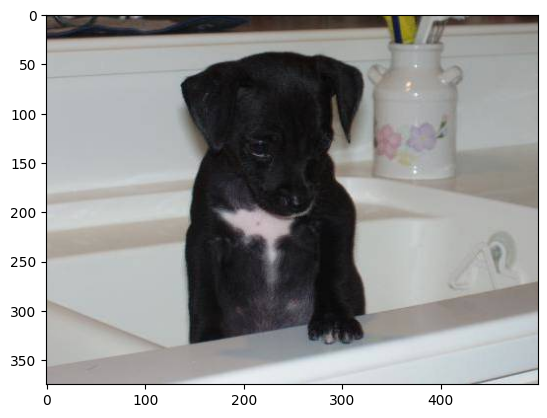

In [23]:
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

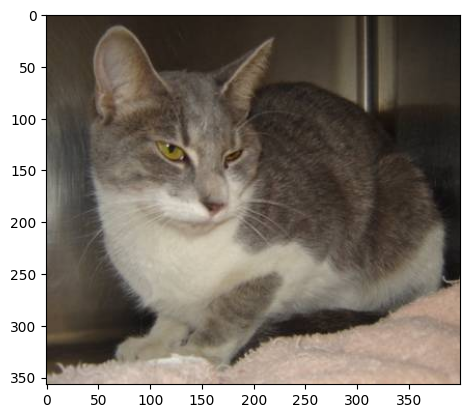

In [24]:
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [25]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])


dog
dog
dog
cat
dog


In [26]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [27]:
os.mkdir('/content/image resized')

In [28]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

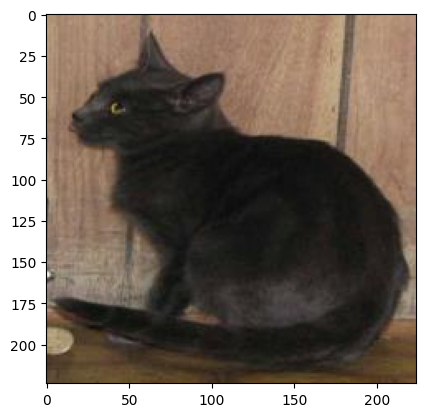

In [29]:
img = mpimg.imread('/content/image resized/cat.10014.jpg')
imgplt = plt.imshow(img)
plt.show()

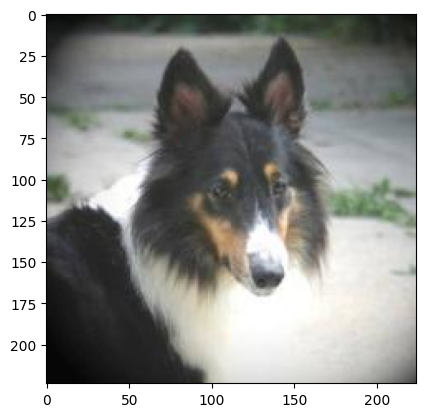

In [30]:
img = mpimg.imread('/content/image resized/dog.10341.jpg')
imgplt = plt.imshow(img)
plt.show()

In [31]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [32]:
print(filenames[0:5])
print(len(filenames))

['dog.5595.jpg', 'dog.8004.jpg', 'dog.2863.jpg', 'cat.7288.jpg', 'dog.4092.jpg']
2000


In [33]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 0, 1]
2000


In [34]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 965 1035]


In [35]:
import cv2
import glob

In [36]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [37]:
print(dog_cat_images)

[[[[ 79  68  71]
   [ 84  73  75]
   [ 84  71  73]
   ...
   [203 178 162]
   [197 171 155]
   [187 161 145]]

  [[ 73  61  67]
   [ 75  64  67]
   [ 75  64  66]
   ...
   [202 177 161]
   [197 171 155]
   [189 163 147]]

  [[ 66  55  63]
   [ 70  60  66]
   [ 72  63  66]
   ...
   [201 176 160]
   [197 172 156]
   [190 165 149]]

  ...

  [[184 166 159]
   [187 169 162]
   [190 172 165]
   ...
   [215 192 176]
   [212 189 173]
   [209 186 170]]

  [[188 169 161]
   [190 171 163]
   [192 173 165]
   ...
   [213 190 174]
   [208 185 169]
   [203 180 164]]

  [[194 174 163]
   [195 175 164]
   [196 176 165]
   ...
   [213 190 174]
   [206 183 167]
   [201 178 162]]]


 [[[149 161 203]
   [142 154 196]
   [126 140 182]
   ...
   [145 164 197]
   [142 161 194]
   [140 159 192]]

  [[152 164 206]
   [143 155 197]
   [124 138 180]
   ...
   [145 164 197]
   [143 162 195]
   [141 160 193]]

  [[151 163 205]
   [138 150 192]
   [117 131 173]
   ...
   [138 158 189]
   [137 157 188]
   [136 156

In [38]:
type(dog_cat_images)

numpy.ndarray

In [39]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [40]:
X = dog_cat_images
Y = np.asarray(labels)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [43]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [44]:
print(X_train_scaled)

[[[[0.49803922 0.53333333 0.58431373]
   [0.23921569 0.2745098  0.3254902 ]
   [0.86666667 0.89803922 0.94901961]
   ...
   [0.02745098 0.03921569 0.03137255]
   [0.05098039 0.07058824 0.0627451 ]
   [0.1372549  0.15686275 0.14901961]]

  [[0.4        0.43529412 0.48627451]
   [0.42745098 0.4627451  0.51372549]
   [0.52941176 0.56078431 0.61176471]
   ...
   [0.02745098 0.03921569 0.03137255]
   [0.03529412 0.05490196 0.04705882]
   [0.10588235 0.1254902  0.11764706]]

  [[0.2627451  0.30980392 0.35686275]
   [0.34509804 0.39215686 0.43921569]
   [0.3372549  0.37254902 0.42352941]
   ...
   [0.03137255 0.04313725 0.03529412]
   [0.01960784 0.03921569 0.03137255]
   [0.0627451  0.08235294 0.0745098 ]]

  ...

  [[0.40392157 0.41568627 0.43529412]
   [0.29411765 0.31372549 0.3254902 ]
   [0.30980392 0.32156863 0.34117647]
   ...
   [0.71372549 0.80784314 0.88627451]
   [0.60392157 0.69803922 0.77647059]
   [0.5254902  0.61960784 0.69803922]]

  [[0.34117647 0.34509804 0.36078431]
   [0.2

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [49]:
def build_mobilenet_model(
    input_shape=(224, 224, 3),
    num_classes=2,
    learning_rate=0.0001
):

    # Load MobileNet base model
    base_model = MobileNet(
        weights="imagenet",
        include_top=False,
        input_shape=input_shape
    )

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Custom classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    # Final model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile model
    model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

    return model

In [50]:
model = build_mobilenet_model(
    input_shape=(224, 224, 3),
    num_classes=2
)

In [51]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5779 - loss: 0.8669
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8789 - loss: 0.2903
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9385 - loss: 0.1719
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9421 - loss: 0.1421
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9579 - loss: 0.1174


In [52]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9580 - loss: 0.1143
Test Loss = 0.08329799026250839
Test Accuracy = 0.9674999713897705


Path of the image to be predicted: /content/image resized/cat.10020.jpg


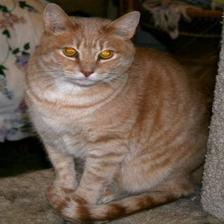

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
[[0.00129932]]
0
The image represents a Cat


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/image resized/dog.101.jpg


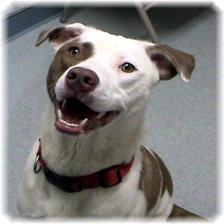

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[0.9929718]]
0
The image represents a Cat


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')